In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import tensorflow as tf

In [41]:
df = pd.read_csv("hourly_stock_chunks\AAPL_hourly.csv")
print("Data loaded successfully. Showing head:")
print(df.head())

Data loaded successfully. Showing head:
                    Datetime                Open                High  \
0                        NaN                AAPL                AAPL   
1  2025-02-25 14:30:00+00:00               248.0  249.52000427246094   
2  2025-02-25 15:30:00+00:00   245.1300048828125   246.8699951171875   
3  2025-02-25 16:30:00+00:00  246.53500366210938  249.97999572753906   
4  2025-02-25 17:30:00+00:00   249.5800018310547   249.6199951171875   

                  Low               Close    Volume ticker company  
0                AAPL                AAPL      AAPL    NaN     NaN  
1  244.91000366210938  245.11000061035156  12543164   AAPL   Apple  
2  244.91000366210938  246.52499389648438   4912697   AAPL   Apple  
3   246.4300994873047   249.5800018310547   6711987   AAPL   Apple  
4  247.72999572753906  247.97999572753906   3191684   AAPL   Apple  


In [42]:
df['Datetime'] = pd.to_datetime(df['Datetime'], utc=True)

df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

print("\nMissing values before cleaning:")
print(df.isnull().sum())

df = df.dropna(subset=['Close']).sort_values("Datetime").reset_index(drop=True)

print("\nData after dropping missing 'Close' values:")
print(df.isnull().sum())



Missing values before cleaning:
Datetime    1
Open        0
High        0
Low         0
Close       1
Volume      0
ticker      1
company     1
dtype: int64

Data after dropping missing 'Close' values:
Datetime    0
Open        0
High        0
Low         0
Close       0
Volume      0
ticker      0
company     0
dtype: int64


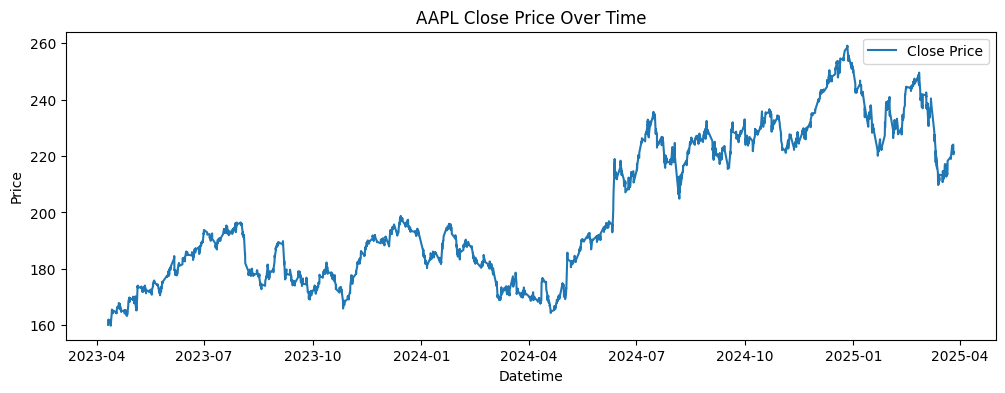

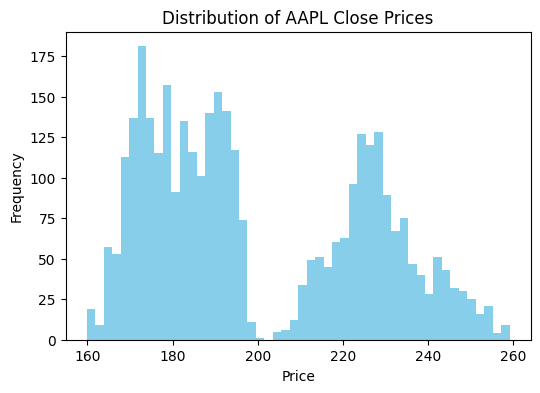

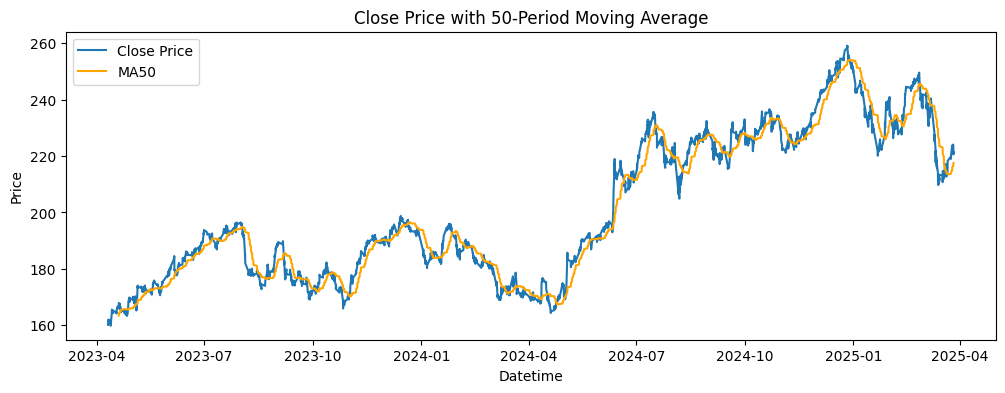

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(df['Datetime'], df['Close'], label='Close Price')
plt.title("AAPL Close Price Over Time")
plt.xlabel("Datetime")
plt.ylabel("Price")
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(df['Close'], bins=50, color='skyblue')
plt.title("Distribution of AAPL Close Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

df['MA50'] = df['Close'].rolling(window=50).mean()
plt.figure(figsize=(12, 4))
plt.plot(df['Datetime'], df['Close'], label='Close Price')
plt.plot(df['Datetime'], df['MA50'], label='MA50', color='orange')
plt.title("Close Price with 50-Period Moving Average")
plt.xlabel("Datetime")
plt.ylabel("Price")
plt.legend()
plt.show()


In [44]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = df.drop(columns=["MA50"], errors="ignore")

scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df[['Close']])

def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_close, seq_length=50)


In [45]:
split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Dataset prepared for LSTM")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


Dataset prepared for LSTM
X_train shape: (3042, 50, 1)
X_test shape: (339, 50, 1)


In [46]:
model = Sequential()
model.add(LSTM(96, return_sequences=True, input_shape=(50, 1)))
model.add(Dropout(0.2))
model.add(LSTM(96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(96))
model.add(Dropout(0.2))
model.add(Dense(1)) 

c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 221ms/step - loss: 0.0393 - val_loss: 0.0037
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - loss: 0.0025 - val_loss: 0.0040
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - loss: 0.0020 - val_loss: 0.0033
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 9/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 10/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 231ms/step - loss: 0.0018 - val_loss: 0.0020


Model saved as 'trained_lstm_hourly_model.h5'


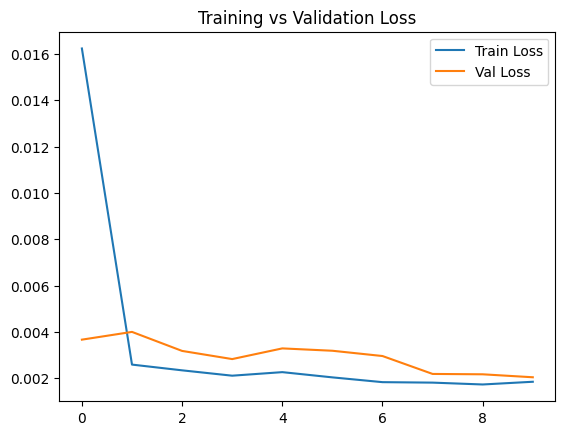

In [47]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

model.save("trained_lstm_hourly_model.h5")
print("Model saved as 'trained_lstm_hourly_model.h5'")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

Loaded model from 'trained_lstm_hourly_model.h5'
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step


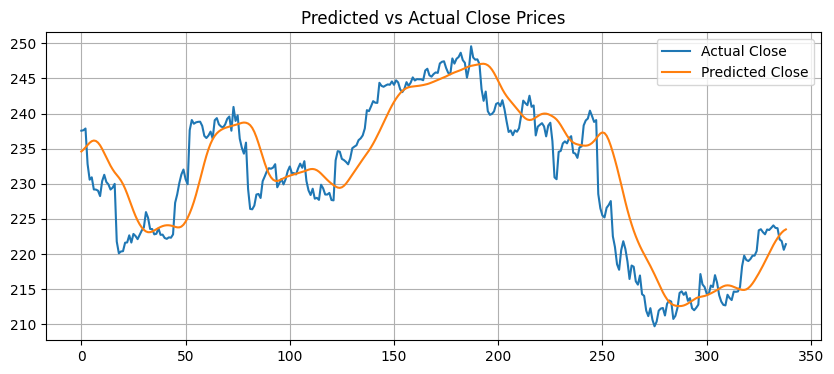

In [48]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model = load_model("trained_lstm_hourly_model.h5")
print("Loaded model from 'trained_lstm_hourly_model.h5'")

preds = model.predict(X_test)
preds_rescaled = scaler.inverse_transform(preds)
y_test_rescaled = scaler.inverse_transform(y_test)

plt.figure(figsize=(10, 4))
plt.plot(y_test_rescaled, label="Actual Close")
plt.plot(preds_rescaled, label="Predicted Close")
plt.title("Predicted vs Actual Close Prices")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
current_closes = scaler.inverse_transform(X_test[:, -1, :])

predicted_trend = (preds_rescaled.flatten() > current_closes.flatten()).astype(int)
actual_trend = (y_test_rescaled.flatten() > current_closes.flatten()).astype(int)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Classification Metrics (UP/DOWN):")
print("Accuracy: ", accuracy_score(actual_trend, predicted_trend))
print("Precision:", precision_score(actual_trend, predicted_trend))
print("Recall:   ", recall_score(actual_trend, predicted_trend))
print("F1 Score: ", f1_score(actual_trend, predicted_trend))


Classification Metrics (UP/DOWN):
Accuracy:  0.528023598820059
Precision: 0.5375722543352601
Recall:    0.5375722543352601
F1 Score:  0.5375722543352601


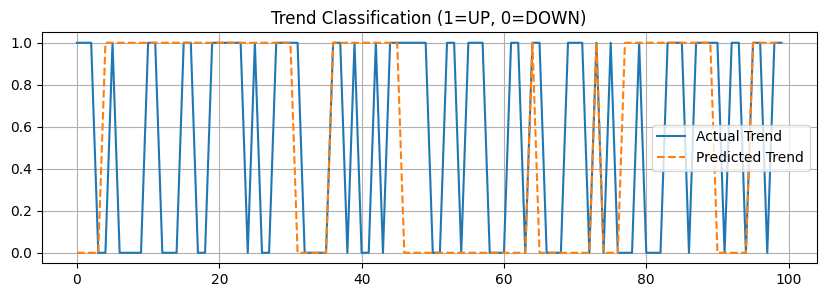

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(actual_trend[:100], label="Actual Trend")
plt.plot(predicted_trend[:100], label="Predicted Trend", linestyle="dashed")
plt.title("Trend Classification (1=UP, 0=DOWN)")
plt.legend()
plt.grid(True)
plt.show()